# Figure of Renewable Energy Zones

In [11]:
import warnings

import numpy as np
import geopandas

%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

import cartopy.crs as ccrs
import cartopy
cartopy.config['pre_existing_data_dir'] = '/g/data/w42/dr6273/work/data/cartopy-data/'
cartopy.config['data_dir'] = '/g/data/w42/dr6273/work/data/cartopy-data/'
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

In [2]:
%cd /g/data/w42/dr6273/work/project_demo

/g/data/w42/dr6273/work/project_demo


In [3]:
%matplotlib inline

In [29]:
FONTSIZE = 8
plt_params = {
    'font.size': FONTSIZE,
    'legend.fontsize' : FONTSIZE - 1,
}

# Load REZ and city shapefiles

In [5]:
rez_file = '/g/data/w42/dr6273/work/data/REZ_boundaries_2021/Indicative_REZ_boundaries_2021_-_GIS_data-polygon.shp'
rez_gpd = geopandas.read_file(rez_file)

Add central coords of REZ regions

In [6]:
rez_gpd['coords'] = rez_gpd['geometry'].apply(lambda x: x.representative_point().coords[:])
rez_gpd['coords'] = [coords[0] for coords in rez_gpd['coords']]

Add column of energy type codes

In [8]:
region_codes = [
    3, 7, 3, 3, 2, 2, 4, 4,     # NSW
    1, 1, 1, 1,                 # Offshore wind
    5, 7, 6, 7, 3, 7, 6, 3, 7,  # QLD
    1, 3, 1, 1, 4, 3, 2, 3, 3,  # SA
    3, 7, 7,                    # TAS
    6, 3, 1, 1, 3, 2            # VIC
]

In [9]:
rez_gpd['energy_code'] = 0

In [12]:
with warnings.catch_warnings():
    warnings.simplefilter('ignore')
    
    rez_gpd['energy_code'].iloc[9:17] = region_codes[:8]
    rez_gpd['energy_code'].iloc[[33, 34, 37, 38]] = region_codes[8:12]
    rez_gpd['energy_code'].iloc[:9] = region_codes[12:21]
    rez_gpd['energy_code'].iloc[23:32] = region_codes[21:30]
    rez_gpd['energy_code'].iloc[[32, 35, 36]] = region_codes[30:33]
    rez_gpd['energy_code'].iloc[17:23] = region_codes[33:]

In [13]:
gccsa_file = '/g/data/w42/dr6273/work/data/ABS/ABS_GCCSA_2021/GCCSA_2021_AUST_GDA2020.shp'
gccsa_gpd = geopandas.read_file(gccsa_file)

In [14]:
gccsa_gpd = gccsa_gpd.loc[
    (gccsa_gpd['GCC_NAME21'] == 'Greater Sydney') |
    (gccsa_gpd['GCC_NAME21'] == 'Greater Melbourne') |
    (gccsa_gpd['GCC_NAME21'] == 'Greater Brisbane') |
    (gccsa_gpd['GCC_NAME21'] == 'Greater Adelaide') |
    (gccsa_gpd['GCC_NAME21'] == 'Australian Capital Territory') |
    (gccsa_gpd['GCC_NAME21'] == 'Greater Hobart')
]

In [53]:
def plot_REZ_GCCSA(ax):
    """
    Plot REZ and GCCSA shape files with labels.
    """
    ax.set_extent([132, 161.5, -9, -46])
    ax.add_feature(
        cartopy.feature.NaturalEarthFeature(
            category='cultural',
            name='admin_1_states_provinces',
            scale='10m'
        ),
        facecolor='none',
        edgecolor='k',
        lw=.2,
        rasterized=True
    )
    ax.coastlines(resolution="50m", lw=0.5, rasterized=True)
    
    alpha=0.6
    for i in range(len(rez_gpd)):
        d = rez_gpd.iloc[i:i+1]
        code = d.iloc[0]['energy_code']
        if (code == 1) | (code == 5):
            d.plot(ax=ax, alpha=alpha, color="tab:blue", label='Wind', rasterized=True)
        elif (code == 2) | (code == 6):
            d.plot(ax=ax, alpha=alpha, color="tab:orange", label='Solar', rasterized=True)
        elif (code == 3) | (code == 7):
            d.plot(ax=ax, alpha=alpha, color="tab:purple", label='Wind and solar', rasterized=True)
        elif code == 4:
            pass
        else:
            raise ValueError('Incorrect code')
                        
    for idx, row in rez_gpd.iterrows():
        code = row['energy_code']
        label = row['Name'][:2]
        
        if label in ['O1', 'O2', 'Q1', 'Q3', 'Q6']:
            x = row.coords[0] + 1
            y = row.coords[1]
        elif label == 'O3':
            x = row.coords[0] + 1
            y = row.coords[1] - 0.5
        elif label == 'O4':
            x = row.coords[0]
            y = row.coords[1] + 0.5
        else:
            x = row.coords[0]
            y = row.coords[1]

    gccsa_gpd.plot(ax=ax, edgecolor="tab:red", facecolor="tab:red", alpha=alpha, rasterized=True)
    
    ax.text(138.5, -24.5, 'QLD')
    ax.text(141.5, -30.5, 'NSW')
    ax.text(132.5, -27.5, 'SA')
    ax.text(137.5, -40.5, 'VIC')
    ax.text(142, -44.5, 'TAS')
    ax.text(153, -38, 'Offshore')
    
    ax.text(154, -28, 'Brisbane')
    ax.text(154, -34, 'Sydney')
    ax.text(135., -42, 'Melbourne')
    ax.text(132.3, -38, 'Adelaide')
    ax.text(153, -36, 'Canberra')
    ax.text(148, -44, 'Hobart')
    
    ax.plot((151.7, 153.5), (-33.7, -33.7), c="tab:red") # SYD
    ax.plot((142.2, 144.5), (-40.9, -38.5), c="tab:red") # MLB
    ax.plot((141., 142), (-39.3, -38.5), c='k') # VIC
    ax.plot((138.5, 138.5), (-37, -36), c="tab:red") # ADL
    ax.plot((149.5, 152.5), (-35.7, -35.7), c="tab:red") # CBR
    
    # Offshore lines
    ax.plot((152.5, 152), (-37.7, -33.8), c="tab:blue", ls='--')
    ax.plot((152.5, 151.4), (-37.7, -35), c="tab:blue", ls='--')
    ax.plot((152.5, 148.2), (-37.7, -38.5), c="tab:blue", ls='--')
    ax.plot((152.5, 145.9), (-37.7, -40.5), c="tab:blue", ls='--')
    
    # Custom legend
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Solar',
                markerfacecolor="tab:orange", markersize=12, alpha=alpha),
        Line2D([0], [0], marker='o', color='w', label='Wind',
                markerfacecolor="tab:blue", markersize=12, alpha=alpha),
        Line2D([0], [0], marker='o', color='w', label='Solar and\nwind',
                markerfacecolor="tab:purple", markersize=12, alpha=alpha)
    ]
    ax.legend(
        frameon=False,
        handles=legend_elements,
        loc=(0.5, 0.7),
        fontsize=plt_params['font.size'],
        labelspacing=.8
    )

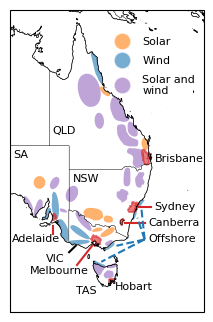

In [54]:
with plt.rc_context(plt_params):
    fig, ax = plt.subplots(1, 1, subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(2.5, 5))
    plot_REZ_GCCSA(ax)
    plt.savefig("./figures/REZ.pdf", format="pdf", dpi=400, bbox_inches="tight")